<a href="https://colab.research.google.com/github/bbwolcott/nyu-python-public-policy/blob/master/Hw_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NYU Wagner - Python Coding for Public Policy**
# Ben Wolcott HW 7: Final Assignment

In [0]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt 
import numpy as np
import statsmodels.api as sm

In [0]:
# You can use pd.set_option() to make sure you see all the rows and columns in your dataframe
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
drive.mount('/content/drive')
# follow the link it generates, choose your account, and then paste in the authorization code it provides

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [28]:
df311 = pd.read_csv('/content/drive/My Drive/Data for Python/cleaned_311_data_revised.csv', header='infer')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10,19,20,22,33,36,37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
indicators = pd.read_csv('https://planninglabs.carto.com/api/v2/sql?format=csv&q=SELECT%20cartodb_id,the_geom,the_geom_webmercator,acres,acs_tooltip,acs_tooltip_2,acs_tooltip_3,area_sqmi,borocd,cb_email,cb_website,cd_full_title,cd_short_title,cd_son_fy2018,cd_tot_bldgs,cd_tot_resunits,count_hosp_clinic,count_libraries,count_parks,count_public_schools,crime_count,crime_count_boro,crime_count_nyc,crime_per_1000,crime_per_1000_boro,crime_per_1000_nyc,female_10_14,female_15_19,female_20_24,female_25_29,female_30_34,female_35_39,female_40_44,female_45_49,female_5_9,female_50_54,female_55_59,female_60_64,female_65_69,female_70_74,female_75_79,female_80_84,female_85_over,female_under_5,fp_100_area,fp_100_bldg,fp_100_cost_burden,fp_100_cost_burden_value,fp_100_mhhi,fp_100_mortg_value,fp_100_openspace,fp_100_ownerocc,fp_100_ownerocc_value,fp_100_permortg,fp_100_pop,fp_100_rent_burden,fp_100_rent_burden_value,fp_100_resunits,fp_500_area,fp_500_bldg,fp_500_cost_burden,fp_500_cost_burden_value,fp_500_mhhi,fp_500_mortg_value,fp_500_openspace,fp_500_ownerocc,fp_500_ownerocc_value,fp_500_permortg,fp_500_pop,fp_500_rent_burden,fp_500_rent_burden_value,fp_500_resunits,lep_rate,lep_rate_boro,lep_rate_nyc,lot_area_commercial_office,lot_area_industrial_manufacturing,lot_area_mixed_use,lot_area_open_space,lot_area_other_no_data,lot_area_parking,lot_area_public_facility_institution,lot_area_res_1_2_family_bldg,lot_area_res_multifamily_elevator,lot_area_res_multifamily_walkup,lot_area_transportation_utility,lot_area_vacant,lots_commercial_office,lots_industrial_manufacturing,lots_mixed_use,lots_open_space,lots_other_no_data,lots_parking,lots_public_facility_institution,lots_res_1_2_family_bldg,lots_res_multifamily_elevator,lots_res_multifamily_walkup,lots_total,lots_transportation_utility,lots_vacant,male_10_14,male_15_19,male_20_24,male_25_29,male_30_34,male_35_39,male_40_44,male_45_49,male_5_9,male_50_54,male_55_59,male_60_64,male_65_69,male_70_74,male_75_79,male_80_84,male_85_over,male_under_5,mean_commute,mean_commute_boro,mean_commute_nyc,moe_bach_deg,moe_bach_deg_boro,moe_bach_deg_nyc,moe_foreign_born,moe_hh_rent_burd,moe_hh_rent_burd_boro,moe_hh_rent_burd_nyc,moe_lep_rate,moe_lep_rate_boro,moe_lep_rate_nyc,moe_mean_commute,moe_mean_commute_boro,moe_mean_commute_nyc,moe_over65_rate,moe_over65_rate_boro,moe_over65_rate_nyc,moe_poverty_rate,moe_under18_rate,moe_under18_rate_boro,moe_under18_rate_nyc,moe_unemnployment,moe_unemployment_boro,moe_unemployment_cd,neighborhoods,over65_rate,over65_rate_boro,over65_rate_nyc,pct_asian_nh,pct_bach_deg,pct_bach_deg_boro,pct_bach_deg_nyc,pct_black_nh,pct_clean_strts,pct_clean_strts_boro,pct_clean_strts_nyc,pct_foreign_born,pct_hh_rent_burd,pct_hh_rent_burd_boro,pct_hh_rent_burd_nyc,pct_hispanic,pct_other_nh,pct_served_parks,pct_white_nh,pop_2000,pop_2010,pop_acs,pop_change_00_10,poverty_rate,poverty_rate_boro,poverty_rate_nyc,puma,shared_puma,shared_puma_cd,son_issue_1,son_issue_2,son_issue_3,total_lot_area,under18_rate,under18_rate_boro,under18_rate_nyc,unemployment_boro,unemployment_cd,unemployment_nyc%20FROM%20community_district_profiles&filename=indicators.csv', header='infer' )

In [0]:
indicators = indicators[['borocd', 'lep_rate']]

## **Problem Statement:** 
311 data is an incredible resource, but one major concern with 311 complaints is that there can be bias in the data. The fact that one community district has a higher number of 311 noise complaints, doesn't necessarily mean it is actually louder than another community district. It simply means more people submitted 311 complaints. Some neighborhoods may have residents that are more likely to submit complaints than others for various reasons (ex: different expectations, more awareness about 311, more free time, more sense of empowerment or hope that the complaint will be resolved, etc). This makes it difficult to get a clear picture of conditions across the city, and it can help to compare datasets against each other.

[Community District Profiles](https://communityprofiles.planning.nyc.gov/) is an application that provides objective statistics about community districts. In this assignment, you will chose an indicator published on Community District Profiles and compare it against 311 complaint data. 

**Some ideas for inspiration:**
- How does the number of buildings in the floodplain correlate with the number of 311 flooding complaints?
- How does the street cleanliness score correlate with 311 complaints about garbage and cleanliness?
- How does the percent of residents living in rent burden correlate with a number of 311 housing complaints (no heat/hot water or unsanitary conditions)?

**Note:** This is a more open ended assignment where you can dig into policy concerns that are of greatest interest to you. If the results of your analysis are inconclusive, that is okay, as long as you are using proper python coding techniques. You will be graded on approach and methodology, rather than the outcome of the analysis.

**Step 1**. Select an indicator from the Community District Profiles data that you want to analyze for this assignment. Create a dataframe that only captures the borocd and selected indicator column.

In [55]:
indicators = indicators[['borocd', 'lep_rate']]
indicators.head()

,borocd,lep_rate
0,101,5.8
1,102,5.8
2,103,29.4
3,104,9.6
4,105,9.6


**Step 2**. Review the complaint types in the 311 complaint data. Choose the complaint type(s) you hypothesize should correlate with the indicator you chose in Step 2. Create a new dataframe that only captures the 311 complaints you want to analyze.

In [35]:
Noise = df311[df311['complaint_type'] =='Noise - Residential']
Noise.head()

,Unnamed: 0,Unnamed: 0.1,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,cross_street_1,cross_street_2,intersection_street_1,intersection_street_2,address_type,city,landmark,facility_type,status,due_date,resolution_description,resolution_action_updated_date,community_board,bbl,borough,x_coordinate_(state_plane),y_coordinate_(state_plane),open_data_channel_type,park_facility_name,park_borough,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,location,borocd
2,2,2,39882869,08/01/2018 12:00:54 AM,08/01/2018 12:49:55 AM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11216,761 LINCOLN PLACE,LINCOLN PLACE,ROGERS AVENUE,NOSTRAND AVENUE,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,08/01/2018 08:00:54 AM,The Police Department responded to the complai...,08/01/2018 12:49:55 AM,08 BROOKLYN,3.012540e+09,BROOKLYN,997732.0,183674.0,MOBILE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.670809,-73.951399,"(40.67080917938279, -73.9513990916184)",308.0
11,11,11,39883376,08/01/2018 12:04:41 AM,08/01/2018 03:38:54 AM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,10456,1041 FINDLAY AVENUE,FINDLAY AVENUE,EAST 165 STREET,EAST 166 STREET,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,08/01/2018 08:04:41 AM,The Police Department responded to the complai...,08/01/2018 03:38:54 AM,04 BRONX,2.024330e+09,BRONX,1007930.0,241405.0,PHONE,Unspecified,BRONX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.829245,-73.914433,"(40.829244677725754, -73.91443331831667)",204.0
16,16,16,39886233,08/01/2018 12:06:29 AM,08/01/2018 02:54:24 AM,NYPD,New York City Police Department,Noise - Residential,Banging/Pounding,Residential Building/House,11693,82-01 BEACH CHANNEL DRIVE,BEACH CHANNEL DRIVE,BEACH 81 STREET,BEACH 83 STREET,NaN,NaN,ADDRESS,FAR ROCKAWAY,NaN,Precinct,Closed,08/01/2018 08:06:29 AM,The Police Department responded to the complai...,08/01/2018 02:54:24 AM,14 QUEENS,4.161140e+09,QUEENS,1037327.0,154262.0,PHONE,Unspecified,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.589931,-73.808896,"(40.58993080750793, -73.80889570815852)",414.0
17,17,17,39881426,08/01/2018 12:06:42 AM,08/01/2018 04:00:03 AM,NYPD,New York City Police Department,Noise - Residential,Banging/Pounding,Residential Building/House,10457,1654 MONROE AVENUE,MONROE AVENUE,EAST MT EDEN AVENUE,EAST 173 STREET,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,08/01/2018 08:06:42 AM,The Police Department responded to the complai...,08/01/2018 04:00:03 AM,04 BRONX,2.027910e+09,BRONX,1010037.0,246441.0,PHONE,Unspecified,BRONX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843061,-73.906800,"(40.84306113235555, -73.90680040695833)",204.0
18,18,18,39880309,08/01/2018 12:06:51 AM,08/01/2018 04:54:26 AM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11216,64 HERKIMER STREET,HERKIMER STREET,BEDFORD AVENUE,NOSTRAND AVENUE,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,08/01/2018 08:06:51 AM,The Police Department responded to the complai...,08/01/2018 04:54:26 AM,03 BROOKLYN,3.018650e+09,BROOKLYN,997776.0,186919.0,PHONE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.679716,-73.951234,"(40.67971590505359, -73.95123396494363)",303.0


**Step 3**. Write out the hypothesis for your analysis. What relationship are you expecting to find between the variables and why?

If a community district has a higher percentage of "residents that self-identify as having limited English proficiency", I hypothesize that there will be fewer residential noise complaints. I hypothesize people are less likely to call 311 if they don't speak English fluently.

**Step 4**. Get the count of 311 complaints per community district (borocd) using the filtered dataframe you created in Step 2.

In [36]:
Noise_cd = Noise.groupby(['borocd','complaint_type']).size().reset_index(name='count')
Noise_cd.head()

,borocd,complaint_type,count
0,101.0,Noise - Residential,722
1,102.0,Noise - Residential,1837
2,103.0,Noise - Residential,6272
3,104.0,Noise - Residential,2702
4,105.0,Noise - Residential,741


**Step 5**. Join the indicator dataframe (from Step 1) with 311 counts dataframe (from Step 4) using the borocd value.

In [0]:
merged = pd.merge(left=Noise_cd, right=indicators, left_on='borocd', right_on='borocd', how='left')

In [54]:
merged.head()

,borocd,complaint_type,count,lep_rate
0,101.0,Noise - Residential,722,5.8
1,102.0,Noise - Residential,1837,5.8
2,103.0,Noise - Residential,6272,29.4
3,104.0,Noise - Residential,2702,9.6
4,105.0,Noise - Residential,741,9.6


**Step 6**. Produce a scatter plot of the indicator values vs. 311 complaint counts. The should be one point per community district.

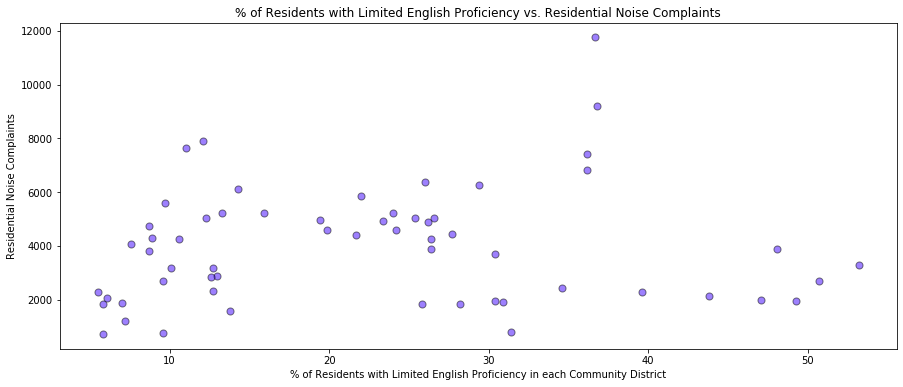

In [44]:
plt.figure(figsize=(15, 6))

plt.scatter(
    np.array(merged['lep_rate']), 
    np.array(merged['count']),
    s=50,
    c='#3d03fc',
    edgecolors='black',
    alpha=0.5)

plt.title('% of Residents with Limited English Proficiency vs. Residential Noise Complaints')
plt.xlabel('% of Residents with Limited English Proficiency in each Community District')
plt.ylabel('Residential Noise Complaints')

plt.show()

**Step 7**. Conduct an OLS linear regression using the indicator values vs. 311 complaint counts and interpret the results.

In [0]:
x = np.array(merged['lep_rate'])
y = np.array(merged['count'])
# x = Add a constant 
x = sm.add_constant(x)

model = sm.OLS(y, x).fit()

In [46]:
# Print out the statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.5634
Date:                Fri, 13 Dec 2019   Prob (F-statistic):              0.456
Time:                        01:39:26   Log-Likelihood:                -536.50
No. Observations:                  59   AIC:                             1077.
Df Residuals:                      57   BIC:                             1081.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3628.6111    566.552      6.405      0.0

**Step 8**. Use the linear regression results to add a line of best fit to your scatterplot

In [50]:
p = model.params # intercept and coefficient
print('parameters:', p)

r2 = model.rsquared
print('R2:', r2)

# let's make labels for the lines of the best fit to use on a scatter plot

label = 'y = ' + str(round(p[1],2)) + 'x + ' + str(round(p[0],2)) + '; R2 = ' + str(round(r2,3))
print(label)

x_dummy = np.array(merged['lep_rate'])

parameters: [3628.61108807   16.39294307]
R2: 0.009788100573475456
y = 16.39x + 3628.61; R2 = 0.01


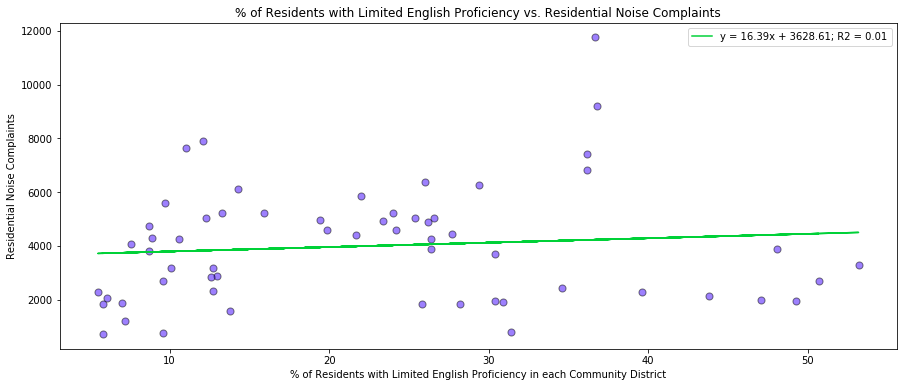

In [52]:
plt.figure(figsize=(15, 6))

plt.scatter(
    np.array(merged['lep_rate']), 
    np.array(merged['count']),
    s=50,
    c='#3d03fc',
    edgecolors='black',
    alpha=0.5)

# line of best fit, with y intercept
plt.plot(
    x_dummy, 
    p[0] + p[1] * x_dummy,
    c='#00d138',
    label=label)

plt.title('% of Residents with Limited English Proficiency vs. Residential Noise Complaints')
plt.xlabel('% of Residents with Limited English Proficiency in each Community District')
plt.ylabel('Residential Noise Complaints')
plt.legend()

plt.show()

**Step 9**. Write a paragraph explaining the results of your analysis? Have you found a meaningful relationship?

My hypothesis is not supported by the data, and I have not found a meaningful relationship. The relevant coefficeint has a p-value of .456, so it not possible to reject the null hypothesis that there is no relationship between the percentage of residents with limited English proficiency and the number of residential noise complaints. I had thought that neighborhoods with a higher percentage of residents with limited English proficiency would have fewer complaints, but that is not the case. One new hypothesis I have is that there are two countervailing effects. While neighborhoods with a higher percentage of residents with less English proficiency may be less likely to make noise complaints all else equal, there may also be more noise in those neighborhoods because many other countries have cultures with more lively streets than the United States.